1. Version  : 1
2. Time     : 15th May
3. Author   : Hui Zhang
4. Function : To test Rubust
5. Relation paper: PBCD method for 0/1 DNN

In [1]:
from google.colab import drive
drive.mount('/content/drive')
# drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive


4431872/4422102 [==============================] - 0s 0us/step


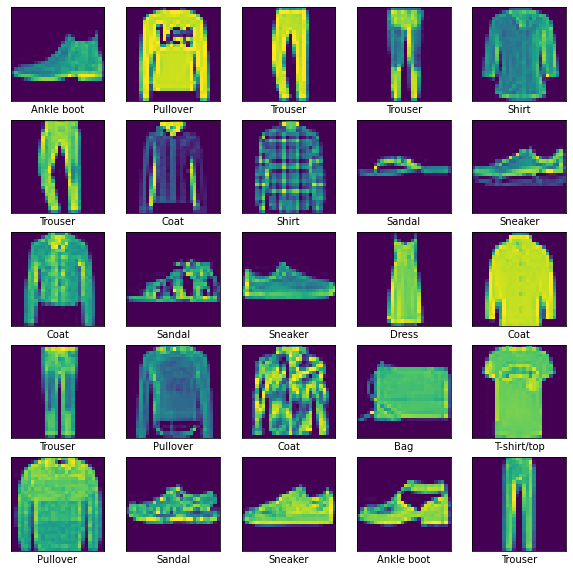

In [2]:
from traitlets.traitlets import default
import numpy as np   # science calculate  instill numpy
import struct  # y???????
# from sklearn.utils import shuffle  # instill scikit-learn/ scikit
import time  
import os  # o??????????
import scipy
from scipy import io
import torch as tc
import tensorflow as tf
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

from tqdm import tqdm, trange
# from tensorflow.keras import keras
from tensorflow.keras.datasets import fashion_mnist
# 导入数据
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Flatten,Activation,BatchNormalization,AveragePooling2D,MaxPooling2D
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
def createNOW_model(directory1):
  chanDim = -1
  input_shape = (28, 28, 1)
  model_original = load_model(directory1)
  #model_original = load_model(CNN_weight_path)
  model = Sequential()
  # Layer 1 Conv2D
  cnn_layer0 = Conv2D(filters = 32, kernel_size = 5, strides = 1, 
                      activation = 'relu', input_shape = input_shape, name = "cn0")
  cnn_layer0.trainable=False
  model.add(cnn_layer0)
  #filters determines the number of kernels to convolve with the input volume. 
  #Each of these operations produces a 2D activation map.

  cnn_layer1= Conv2D(filters = 32, kernel_size = 5, strides = 1, use_bias=False, name = "cn1")
  cnn_layer1.trainable=False
  model.add(cnn_layer1)

  bat_layer2=BatchNormalization(name = "bat2")
  bat_layer2.trainable=False
  model.add(bat_layer2)

  model.add(Activation('relu', name = 'relu3'))

  model.add(MaxPooling2D(pool_size = 2, strides = 2, name = 'max4'))

  model.add(Dropout(0.25, name = 'drop5')) ############## 需要这一层的输出

  
  cnn_layer6= Conv2D(filters = 64, kernel_size = 3, strides = 1, use_bias=False,
                     activation = 'relu', name = "cn6")
  cnn_layer6.trainable=False
  model.add(cnn_layer6)

  
  cnn_layer65 =  Conv2D(filters = 64, kernel_size = 3, strides = 1, use_bias=False, name = "cn65")
  cnn_layer65.trainable=False
  model.add(cnn_layer65)


  bat_layer6 = BatchNormalization(name = "bat7")
  bat_layer6.trainable=False
  model.add(bat_layer6)

  # Layer 4 Pooling Layer
  model.add(Activation('relu', name = 'relu8'))
  
  model.add(MaxPooling2D(pool_size = 2, strides = 2, name = 'max9'))
  model.add(Dropout(0.25, name='drop10'))

  model.add(Flatten(name='flatten11'))

  model.add(Dense(200, use_bias=False))
  model.add(Activation("relu"))
  model.add(Dense(100, use_bias=False))
  model.add(Activation("relu"))

  model.add(Dense(10, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
  model.layers[0].set_weights(model_original.layers[0].get_weights())
  model.layers[1].set_weights(model_original.layers[1].get_weights())
  model.layers[2].set_weights(model_original.layers[2].get_weights())
  model.layers[6].set_weights(model_original.layers[6].get_weights())
  model.layers[7].set_weights(model_original.layers[7].get_weights())
  model.layers[8].set_weights(model_original.layers[8].get_weights())
  return model

def create_all_model(act_my):
  # chanDim = -1
  model = Sequential()
  model.add(Dense(2000, use_bias=False))
  model.add(Activation(act_my))
  model.add(Dense(2000, use_bias=False))
  model.add(Activation(act_my))
  model.add(Dense(10, activation='softmax', use_bias=False))
  model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
  return model

def sgn(x):
    s = tf.sign(x * tf.cast(x > 0, dtype=tf.float32))
    return s
def hardmax(x):  # 返回矩阵值 dimision: 10 * 64
    v1 = np.zeros(x.shape)
    v = np.argmax(x, 0)  # tf.argmax(a,1) 每一列最大值位置
    for i in range(x.shape[1]):
        v1[v[i], i] = 1

    return tf.convert_to_tensor(v1, dtype=tf.float32)
def forward_propagation(X, parameters):
    W1 = parameters["W1"]  # W1 维数 （784, 1000）
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    U1 = tf.matmul(tf.transpose(W1), X)  # + b1 * parameters['gamma1']
    # betch_size =16, nx*nx = 784 X为（784，16）, gamma1为nx*nx，X * gamma1的维数和X维数相同
    V1 = sgn(U1)  # 实现Relu，V1为 (1000，16)为第1隐层的值
    U2 = tf.matmul(tf.transpose(W2), V1)  # + b2    # W2^T 维数 （1000,1000） * parameters['gamma2']
    V2 = sgn(U2)  # 实现Relu，V2 (1000，16)为第2隐层的值
    U3 = tf.matmul(tf.transpose(W3), V2)  # + b3    # W3^T为 （10，1000） * parameters['gamma3']
    V3 = hardmax(U3)  # 输出 维数是10*batch 大小

    cache = {
        "V0": X,
        "U0": X,
        "U1": U1,
        "V1": V1,
        "U2": U2,
        "V2": V2,
        "U3": U3,
        "V3": V3}
    return V3

def forward_propagation_pre(x_tol, parameters_for):
    layers_num = 3
    cache_for = {}
    layer_input = x_tol
    for layer in range(1, layers_num + 1):
        
        locals()['A' + str(layer)] = tf.matmul(tf.transpose(parameters_for['W' + str(layer)]),
                                            layer_input)
        cache_for['A' + str(layer)] = locals()['A' + str(layer)]
        locals()['Z' + str(layer)] = locals()['A' + str(layer)] * tf.cast(locals()['A' + str(layer)] > 0, dtype=tf.float32)
        if layer == layers_num:
          locals()['Z' + str(layer)] = hardmax(locals()['A' + str(layer)])
        else:
          locals()['Z' + str(layer)] = locals()['A' + str(layer)] * tf.cast(locals()['A' + str(layer)] > 0, dtype=tf.float32)
        
        layer_input = locals()['Z' + str(layer)]
        cache_for['Z' + str(layer)] = locals()['Z' + str(layer)]
    return locals()['Z' + str(layers_num)]

def load_parameters(directoryin):
    W1 = np.load(os.path.join(directoryin, 'W1.npy'))
    W2 = np.load(os.path.join(directoryin, 'W2.npy'))
    W3 = np.load(os.path.join(directoryin, 'W3.npy'))
    parameters = {"idx1": np.nonzero(np.ones((W1.shape[0], 1)))[0],
                  "idx2": np.nonzero(np.ones((W2.shape[0], 1)))[0],  
                  "idx3": np.nonzero(np.ones((W3.shape[0], 1)))[0],
                  "W1": tf.convert_to_tensor(W1, dtype=tf.float32),
                  "W2": tf.convert_to_tensor(W2, dtype=tf.float32),
                  "W3": tf.convert_to_tensor(W3, dtype=tf.float32)
                  }
    return parameters

def costloss(V3, Y):
    cost = tf.square(tf.norm(V3 - Y)) / 2
    return cost
def makepicture(X, epi, flag = 1):
  if flag:
    plt.figure(figsize=(6,6))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X)

  plt.figure(figsize=(6,6))
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X+ epi)
  
def model01(test_ch, y_ch):
  x_now = tf.transpose(test_ch)
  y_hat = forward_propagation(x_now, parameters_01)
  return costloss(y_hat, tf.transpose(y_ch))

def modelrelu(Xin, Yin):
  aa25 = forward_propagation_pre(tf.transpose(Xin), parameters_relu)
  acc = costloss(aa25, Yin.T)
  return acc

import numpy as np   # science calculate  instill numpy
import struct  # y???????
# from sklearn.utils import shuffle  # instill scikit-learn/ scikit
import time  
import os  # o??????????
import scipy
from scipy import io
import tensorflow as tf
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

from tqdm import tqdm, trange
# from tensorflow.keras import keras
from tensorflow.keras.datasets import fashion_mnist
# 导入数据
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Flatten,Activation,BatchNormalization,AveragePooling2D,MaxPooling2D
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
u = np.ones((10,1))
for t in range(10):
  u[t] = t

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
y_test = to_categorical(y_test)

directory = ("/content/drive/MyDrive/PBCDcode/FashionMNIST/data/")
directory1 = os.path.join(directory, "prenetwork/fashionCNN.h5")

parameters_01 = load_parameters("/content/drive/MyDrive/PBCDcode/FashionMNIST/data/finalparameter")

filepath = os.path.join(directory, "prenetwork/fashionrobust518.h5")
model_original = load_model(filepath)
W1 = model_original.layers[0].get_weights()
W1 = W1[0]
W2 = model_original.layers[2].get_weights()
W2 = W2[0]
W3 = model_original.layers[4].get_weights()
W3 = W3[0]
parameters_relu = {"W1": W1,
              "W2": W2,
              "W3": W3}

modelnow_fashion = createNOW_model(directory1)
layer_name = 'flatten11'
intermediate_layer_model = tf.keras.Model(inputs = modelnow_fashion.input,
                                      outputs = modelnow_fashion.get_layer(layer_name).output)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    plt.xlabel(class_names[int(np.dot(y_test[i].reshape((1,10)), u))])
plt.show()

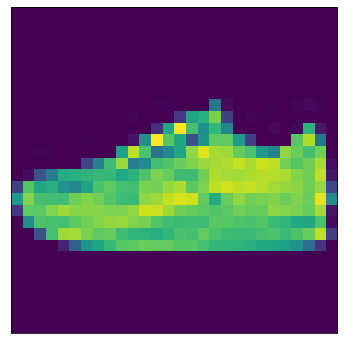

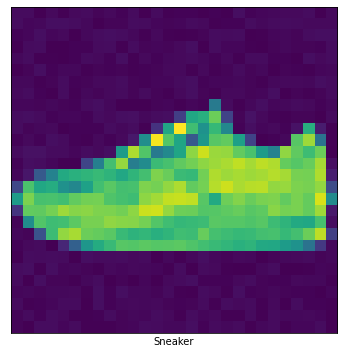

------------------picture NO: 104, noise NO: 12, cost01: 0.0, costrelu: 0.0------------------
------------------picture NO: 104, noise NO: 24, cost01: 0.0, costrelu: 0.0------------------
------------------picture NO: 104, noise NO: 36, cost01: 0.0, costrelu: 0.0------------------
------------------picture NO: 104, noise NO: 48, cost01: 0.0, costrelu: 0.0------------------
------------------picture NO: 104, noise NO: 60, cost01: 0.0, costrelu: 0.0------------------
------------------picture NO: 104, noise NO: 72, cost01: 0.0, costrelu: 0.0------------------
------------------picture NO: 104, noise NO: 84, cost01: 0.0, costrelu: 0.0------------------
------------------picture NO: 104, noise NO: 96, cost01: 0.0, costrelu: 0.0------------------
------------------picture NO: 104, noise NO: 108, cost01: 0.0, costrelu: 0.0------------------
Successful work. picture NO: {}, noise NO: {} 104 119
Sandal


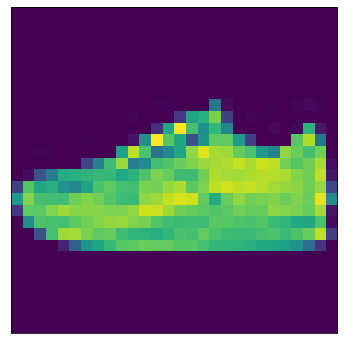

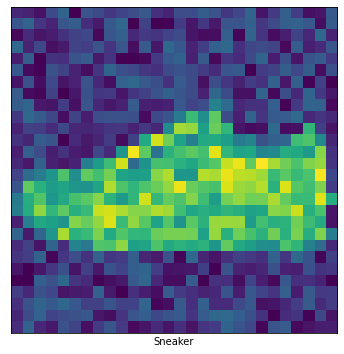

In [18]:
for i in range(1):
  i = 104
  # 101 is better     seed 22 * 134  shirt--> coat
  # 102 is more better seed 21 * 97  sandal--> sneaker
  x_ch = x_test[i:i+1, :,:]
  tf.random.set_seed(21)
  ep1 = 10 * np.random.uniform(low=-0.5, high = 0.5, size=(1, 28, 28))
  test_ch = intermediate_layer_model(x_ch + ep1)
  test_02 = test_ch
  y_ch = y_test[i:i+1,:]
  cost01 = model01(test_ch, y_ch)
  costrelu = modelrelu(test_ch, y_ch)
  
  makepicture(x_ch[0,:,:], ep1[0,:,:])
  plt.xlabel(class_names[int(np.dot(y_test[i].reshape((1,10)), u))])
  plt.show()
  
  if (cost01 == 0) and (costrelu == 0):
    for j in range(1, 2000):
      
      ep1 = j * np.random.uniform(low = -0.5, high = 0.5, size=(1, 28, 28))
      test_ch = intermediate_layer_model(x_ch + ep1)
      cost01 = model01(test_ch, y_ch)
      costrelu = modelrelu(test_ch, y_ch)
      if j % 12 == 0:
        print("------------------picture NO: {}, noise NO: {}, cost01: {}, costrelu: {}------------------".format(i, j, cost01, costrelu))
        # makepicture(x_ch[0,:,:], ep1[0,:,:], 0)
        # plt.show()

      if (cost01 == 0) and (costrelu > 0):
        print("Successful work. picture NO: {}, noise NO: {}", i, j)
        aa25 = forward_propagation_pre(tf.transpose(test_ch), parameters_relu)
        print(class_names[int(np.dot(aa25.numpy().reshape((1,10)), u))])

        np.save(os.path.join(directory, 'result/Robust_noise.npy'), ep1)
        np.save(os.path.join(directory, 'result/PictureforRobust_noise.npy'), x_ch)
        makepicture(x_ch[0,:,:], ep1[0,:,:])
        plt.xlabel(class_names[int(np.dot(y_test[i].reshape((1,10)), u))])
        plt.show()
        
        break
  else: print("----cost01: {}, costrelu: {}-----".format(cost01, costrelu)) # ("Different?Yup. 0/1 and ReLU.-.o.-",cost01, costrelu)

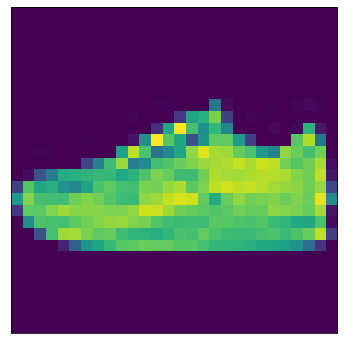

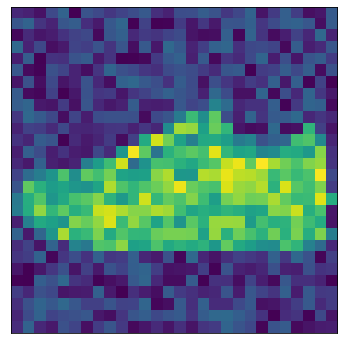

In [19]:
plt.figure(figsize=(6,6))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(x_ch[0,:,:])
plt.savefig("/content/drive/MyDrive/PBCDcode/FashionMNIST/data/result/Robustorigin104sneaker.pdf")


plt.figure(figsize=(6,6))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(x_ch[0,:,:]+ep1[0,:,:])
plt.savefig("/content/drive/MyDrive/PBCDcode/FashionMNIST/data/result/Robustafter104Sandal.pdf")
# test_01- test_02
# aa25 = forward_propagation_pre(tf.transpose(test_ch), parameters_relu)
# print(class_names[int(np.dot(aa25.numpy().reshape((1,10)), u))])

In [ ]:
test_ch = intermediate_layer_model(x_now)
x_now = test_ch.T

parameters = load_parameters("/content/drive/MyDrive/PBCDcode/FashionMNIST/data/preparameter")

y_hat = forward_propagation(x_now, parameters)

y_hat

makepicture(x_train[i], ep1)


# for i in range(10000):
#   tf.random.set_seed(i)
#   X = x_train[5]
#   ep1 = (i % 10) * 10 * tf.random.uniform(low=-0.5, high=0.5, size=(10, 1))    
#   parameters = load_parameters()
#   y_hat = forward_propagation(X+ep1, parameters)


# The CIFAR labels happen to be arrays, 
# which is why you need the extra index
plt.xlabel(class_names[int(np.dot(y_train[i].reshape((1,10)), u))])
plt.show()


(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

modelnow_fashion = createNOW_model(directory1)
layer_name = 'flatten11'
intermediate_layer_model = tf.keras.Model(inputs = modelnow_fashion.input,
                                      outputs = modelnow_fashion.get_layer(layer_name).output)
test_images = []
for i in range(100):
  test_0 = intermediate_layer_model(x_test[i*100:(i+1)*100,:,:])
  if i ==0:
    test_images = test_0.numpy().T
  else:
    test_images = np.hstack((test_images, test_0.numpy().T))

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
u = np.ones((10,1))
for i in range(10):
  u[i] = i
y_train = to_categorical(y_train)
print(y_train[0:3,0:3], y_train[1][0])
# y_test = to_categorical(y_test)
plt.figure(figsize=(6,6))
i = 5
print(x_train[i].shape)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(x_train[i])

ep1 = 100*np.random.uniform(low=-0.5, high=0.5, size=(28, 28))
plt.figure(figsize=(6,6))
i = 5
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(x_train[i]+ ep1)


# for i in range(10000):
#   tf.random.set_seed(i)
#   X = x_train[5]
#   ep1 = (i % 10) * 10 * tf.random.uniform(low=-0.5, high=0.5, size=(10, 1))    
#   parameters = load_parameters()
#   y_hat = forward_propagation(X+ep1, parameters)


# The CIFAR labels happen to be arrays, 
# which is why you need the extra index
plt.xlabel(class_names[int(np.dot(y_train[i].reshape((1,10)), u))])
plt.show()

# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)
# modelfashion_CNN = create_model("relu")

# # modelfashion_CNN.summary()
# history = modelfashion_CNN.fit(x_train, y_train, batch_size = 64, epochs = 50, validation_data=(x_test, y_test))
# # # model specific

# # # # How to evaluate
# loss, acc = modelfashion_CNN.evaluate(x_test, y_test, verbose=2)
# print(loss)

